# Artificial Neural Network

### Importing the libraries

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [25]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [26]:
df = pd.read_csv('../datasets/transformed_ebay_data.csv')

In [27]:
# Drop unnecessary columns 
exclude_indices = list(range(38, 55)) + list(range(56, 60))
df = df.drop(df.columns[exclude_indices], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127778 entries, 0 to 127777
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Unnamed: 0                                              127778 non-null  int64  
 1   num__Price                                              127778 non-null  float64
 2   num__Feedback Score                                     127778 non-null  float64
 3   cat__Listing Type_Auction                               127778 non-null  float64
 4   cat__Listing Type_AuctionWithBIN                        127778 non-null  float64
 5   cat__Listing Type_FixedPrice                            127778 non-null  float64
 6   cat__Listing Type_StoreInventory                        127778 non-null  float64
 7   cat__Shipping Type_Calculated                           127778 non-null  float64
 8   cat__Shipping Type_Calcu

In [28]:
X = df.iloc[:, 2:-2]
y = df.iloc[:, -2]

### Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Normalize the target variable using the training data


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
print(X_train)

[[-0.261806   -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 [ 3.92631008 -0.14133666 -0.0610034  ... -0.28120552  3.75460137
  -0.19641181]
 [-0.27326746 -0.14133666 -0.0610034  ...  3.55611799 -0.26633986
  -0.19641181]
 ...
 [-0.30282872 -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 [-0.2983915  -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 [-0.3030992  -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]]


In [33]:
print(X_test)

[[-0.30304674 -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 [-0.21667366 -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 [ 4.05416172 -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 ...
 [ 0.03222341 -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 [-0.30277859 -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]
 [-0.29586628 -0.14133666 -0.0610034  ... -0.28120552 -0.26633986
  -0.19641181]]


## Part 2 - Building the ANN

### Initializing the ANN

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  # Optional second hidden layer
    Dense(1)  # Single output for regression
])

c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Part 3 - Training the ANN

### Compiling the ANN

In [35]:
ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Training the ANN on the Training set

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann.fit(X_train, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0398 - mae: 0.0746 - val_loss: 0.0157 - val_mae: 0.0555
Epoch 2/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0498 - mae: 0.0591 - val_loss: 0.0068 - val_mae: 0.0564
Epoch 3/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0090 - mae: 0.0559 - val_loss: 0.0072 - val_mae: 0.0568
Epoch 4/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0323 - mae: 0.0577 - val_loss: 0.0066 - val_mae: 0.0543
Epoch 5/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0078 - mae: 0.0553 - val_loss: 0.0066 - val_mae: 0.0544
Epoch 6/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0213 - mae: 0.0554 - val_loss: 0.0066 - val_mae: 0.0526
Epoch 7/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0085 - mae: 0.0545 - val_loss: 0.0065 - val_mae: 0.0537
Epoch 8/100
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0108 - mae: 0.0548 - val_loss: 0.0065 - val_mae: 0.0519
Epoch 9/100
2556/2556 ━━━━━━━━━━

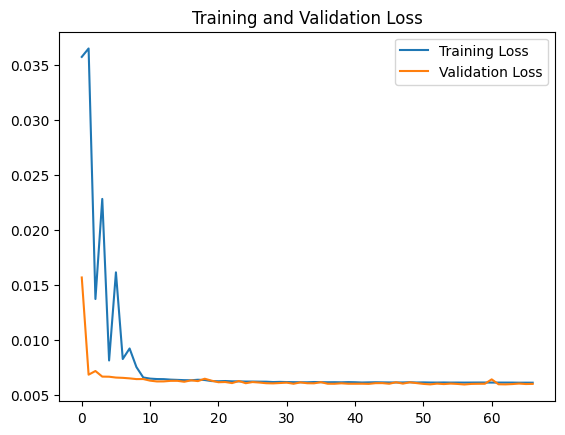

In [37]:
import matplotlib.pyplot as plt

plt.plot(ann.history.history['loss'], label='Training Loss')
plt.plot(ann.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [38]:
y_pred_scaled = ann.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Evaluating the Model Performance

In [39]:
# Compare Predictions with Actuals
comparison = pd.DataFrame({
    'Actual': y_test.values if isinstance(y_test, pd.Series) else y_test,
    'Predicted': y_pred.flatten() if isinstance(y_pred, np.ndarray) else y_pred
})
print(comparison.head())

       Actual   Predicted
0   31.041667  174.977844
1  122.041667  281.366852
2   30.000000  735.522156
3   31.041667  343.768188
4  397.041667  461.553223


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 337.04322269701987
RMSE: 525.0733742757444
R²: 0.22832862919011088
